# Revisit the solution you submitted to assignment 8A (the previous assignment), repeating the classification experiment that was carried out. If you used a dataset that had multiple classes, you may choose a different (binary) dataset, or you can manipulate your dataset, forcing it to be binary.

### Lets start by loading the dataset.

In [0]:
import pandas as pd

fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
data = pd.read_csv(fileURL, names=['Age', 'YearOfSurgery', 'NumOfAxillaryNodes', 'Class'], header=None)

In [2]:
data.head()

,Age,YearOfSurgery,NumOfAxillaryNodes,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Since we are to consider a binary dataset, selecting 2 features for the decision tree.

In [4]:
from sklearn.model_selection import train_test_split

X = data.as_matrix(['Age', 'NumOfAxillaryNodes'])
Y = data['Class'].values.tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Retrain your model using the above suggestions (be sure to split your data into train/test where appropriate).

Let's train the supervised learning model using scikit-learn’s DecisionTreeClassifier

In [0]:
from sklearn import tree

decTreeClf = tree.DecisionTreeClassifier()
decTreeClf = decTreeClf.fit(X_train, Y_train)

In [0]:
Y_predict = decTreeClf.predict(X_test)
Y_predict_proba = decTreeClf.predict_proba(X_test)
Y_predict_proba = Y_predict_proba[:,0]

# Deliver a notebook containing a detailed evaluation report listing the metrics listed below, along with your commentary to each.

### The accuracy of your model on the test data

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_predict)

0.7425742574257426

Lets see what is the surgery survival count.

In [16]:
Y_test.count(1)

74

And now lets see how many people did not survive the surgery.

In [17]:
Y_test.count(2)

27

#### **Evaluation Comment**

The accuracy_score function computes the accuracy as a fraction as shown above(normalize=True by default). If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

We see that the given accuracy_score function gives us the result as a floating point. The computed accuracy is **0.71**. 

This can be considered a good accuracy since it is closer to 1., which means 100%. Thus, it can be said about the trained model that it could predict the correct result (survived/did not survive) about 71% of the time. 

A point worth noting is that since we have fewer instances of patients who did not survive, i.e. 27, this number is fairly less that the count of people who did survive which is 74. Hence, accuracy may not be the most correct evaluation of our model at hand.

### The precision and recall values

In [21]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test, Y_predict, average='binary', pos_label=1)
precision

0.7727272727272727

In [20]:
from sklearn.metrics import recall_score

recall = recall_score(Y_test, Y_predict, average='binary', pos_label=1)
recall

0.918918918918919

#### **Evaluation Comment**

As we know, precision is calculated as TP / TP + FP and recall as TP / TP + FN.

Hence, we can say following:

*   precision is inversely proportional to false positive
*   recall is inversely proportional to false negatives

Ideally, in order to have low false positives and negatives, we need to have high precision and recall values. 
With given model at hand, we can say that the precision of **0.77** and recall of **0.91** are pretty good values for the classifier.

### A classification report (scikit-learn has a function that can create this for you)

In [23]:
from sklearn.metrics import classification_report
import numpy as np

target_names = ['Survived', 'Died']
print(classification_report(Y_test, decTreeClf.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.77      0.92      0.84        74
        Died       0.54      0.26      0.35        27

    accuracy                           0.74       101
   macro avg       0.66      0.59      0.59       101
weighted avg       0.71      0.74      0.71       101



#### **Evaluation Comment**

From sklearn's metric, the classification report function results in a tabular format of results, which include metrics to correctly evaluate the classifier. 

Values for Precision, Recall and F1-score look good for survival cases compared to death cases. This could be because of fewer instances of No Survival cases in the model. Hence, this classifier is a moderately good when it comes to making predictions correctly.

### The confusion matrix for this experiment

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_predict, labels=[1,2])

array([[68,  6],
       [20,  7]])

#### **Evaluation Comment**

If we reference the sklearn documentation for binary classification, 

*   matrix[0][0] holds true negative value - **68**
*   matrix[1][0] holds false negative value - **20**
*   matrix[0][1] holds false positive value - **6**
*   matrix[1][1] holds true positive value - **7**

From the confusion matrix above, we can see that the model correctly predicted the correct class for 75 instances out of the 101 test instances. i.e TN = 68 and TP = 7.
For incorrect class prediction, we see that we have 26 such predictions out of 101 instances, i.e FN = 20 and FP = 6.

We also see that total number of people who survived = TN + FP = 74 and the total number of people who did not survive = TP + FN = 27 which is inline with our earlier evaluation.

### An ROC curve

Populating the interactive namespace from numpy and matplotlib


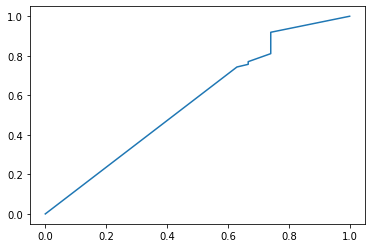

In [28]:
%pylab inline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(Y_test, Y_predict_proba, pos_label=1)

plt.plot(fpr, tpr)
plt.show() 

In [29]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5690690690690691

#### **Evaluation Comment**

We can clearly make the inference that the ROC curve generated above gives a moderately good performance. The area under curve is **0.57** which is just slightly over 50%

As we know, the X-axis in an ROC curve denoted the FPR and the Y-axis denotes the TPR. At point (0,1), it would be the ideal model where the TPR would be 100% TPR and FPR to be 0%.

### A Precision/Recall curve

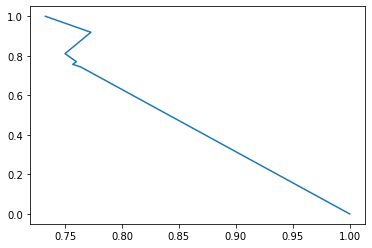

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_test, Y_predict_proba, pos_label=1)

plt.plot(precision, recall)
plt.show() 

In [31]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(Y_test, Y_predict)
average_precision

0.7106893641547106

#### **Evaluation Comment**

It is not always possible to have high values for both precision and recall. Here, point (1,1) is the ideal model. The curve is the graphical representation of these two metrics. We do see a steady slope in this relationship.

So, from the graph we can conclude that, our model is fairly good at making predictions but there is a big room for improvement.